## I will be comparing the models on two datasets; one that has near 1000 rows and has dummy variables for genre, and MPAA rating as ordinal data.

## The other has the same variables, with the added binary variable of being whether or not the show was produced by a large production company or not. This data set only has around 500 rows.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
#1000 row dataset
df_og = pd.read_pickle('Ordinal_MPAA_merged_with_dummy_genres.pkl')

#500 row dataset
df_prod = pd.read_pickle('all_scraped_features_df.pkl')

In [3]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 0 to 974
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    849 non-null    object 
 1   Start_Year               849 non-null    int64  
 2   End_Year                 849 non-null    int64  
 3   Genres                   849 non-null    object 
 4   Num_of_Seasons           849 non-null    int64  
 5   Num_of_Episodes          849 non-null    int64  
 6   Num_Episodes_Per_Season  849 non-null    float64
 7   Season_1_Rating          849 non-null    float64
 8   Years_Ran                849 non-null    int64  
 9   Action                   849 non-null    int64  
 10  Adventure                849 non-null    int64  
 11  Animation                849 non-null    int64  
 12  Biography                849 non-null    int64  
 13  Comedy                   849 non-null    int64  
 14  Crime                    8

In [4]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 476
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    477 non-null    object 
 1   Start_Year               477 non-null    int64  
 2   End_Year                 477 non-null    int64  
 3   Genres                   477 non-null    object 
 4   Num_of_Seasons           477 non-null    int64  
 5   Num_of_Episodes          477 non-null    int64  
 6   Num_Episodes_Per_Season  477 non-null    float64
 7   Season_1_Rating          477 non-null    float64
 8   Years_Ran                477 non-null    int64  
 9   Action                   477 non-null    int64  
 10  Adventure                477 non-null    int64  
 11  Animation                477 non-null    int64  
 12  Biography                477 non-null    int64  
 13  Comedy                   477 non-null    int64  
 14  Crime                    4

In [7]:
#filter the datasets to just the variables we care about, keeping target at the end
features1 = ['Start_Year', 'Num_Episodes_Per_Season', 'Season_1_Rating',
            'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 
            'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 
            'History', 'Horror', 'Music', 'Mystery', 'Other', 'Romance', 
            'Sci-fi', 'Sport', 'Thriller', 'War', 'Ordinal_MPAA']

features2 = features1.copy()
features2.append('Large_prod_co')

target = 'Num_of_Seasons'

## First dataset

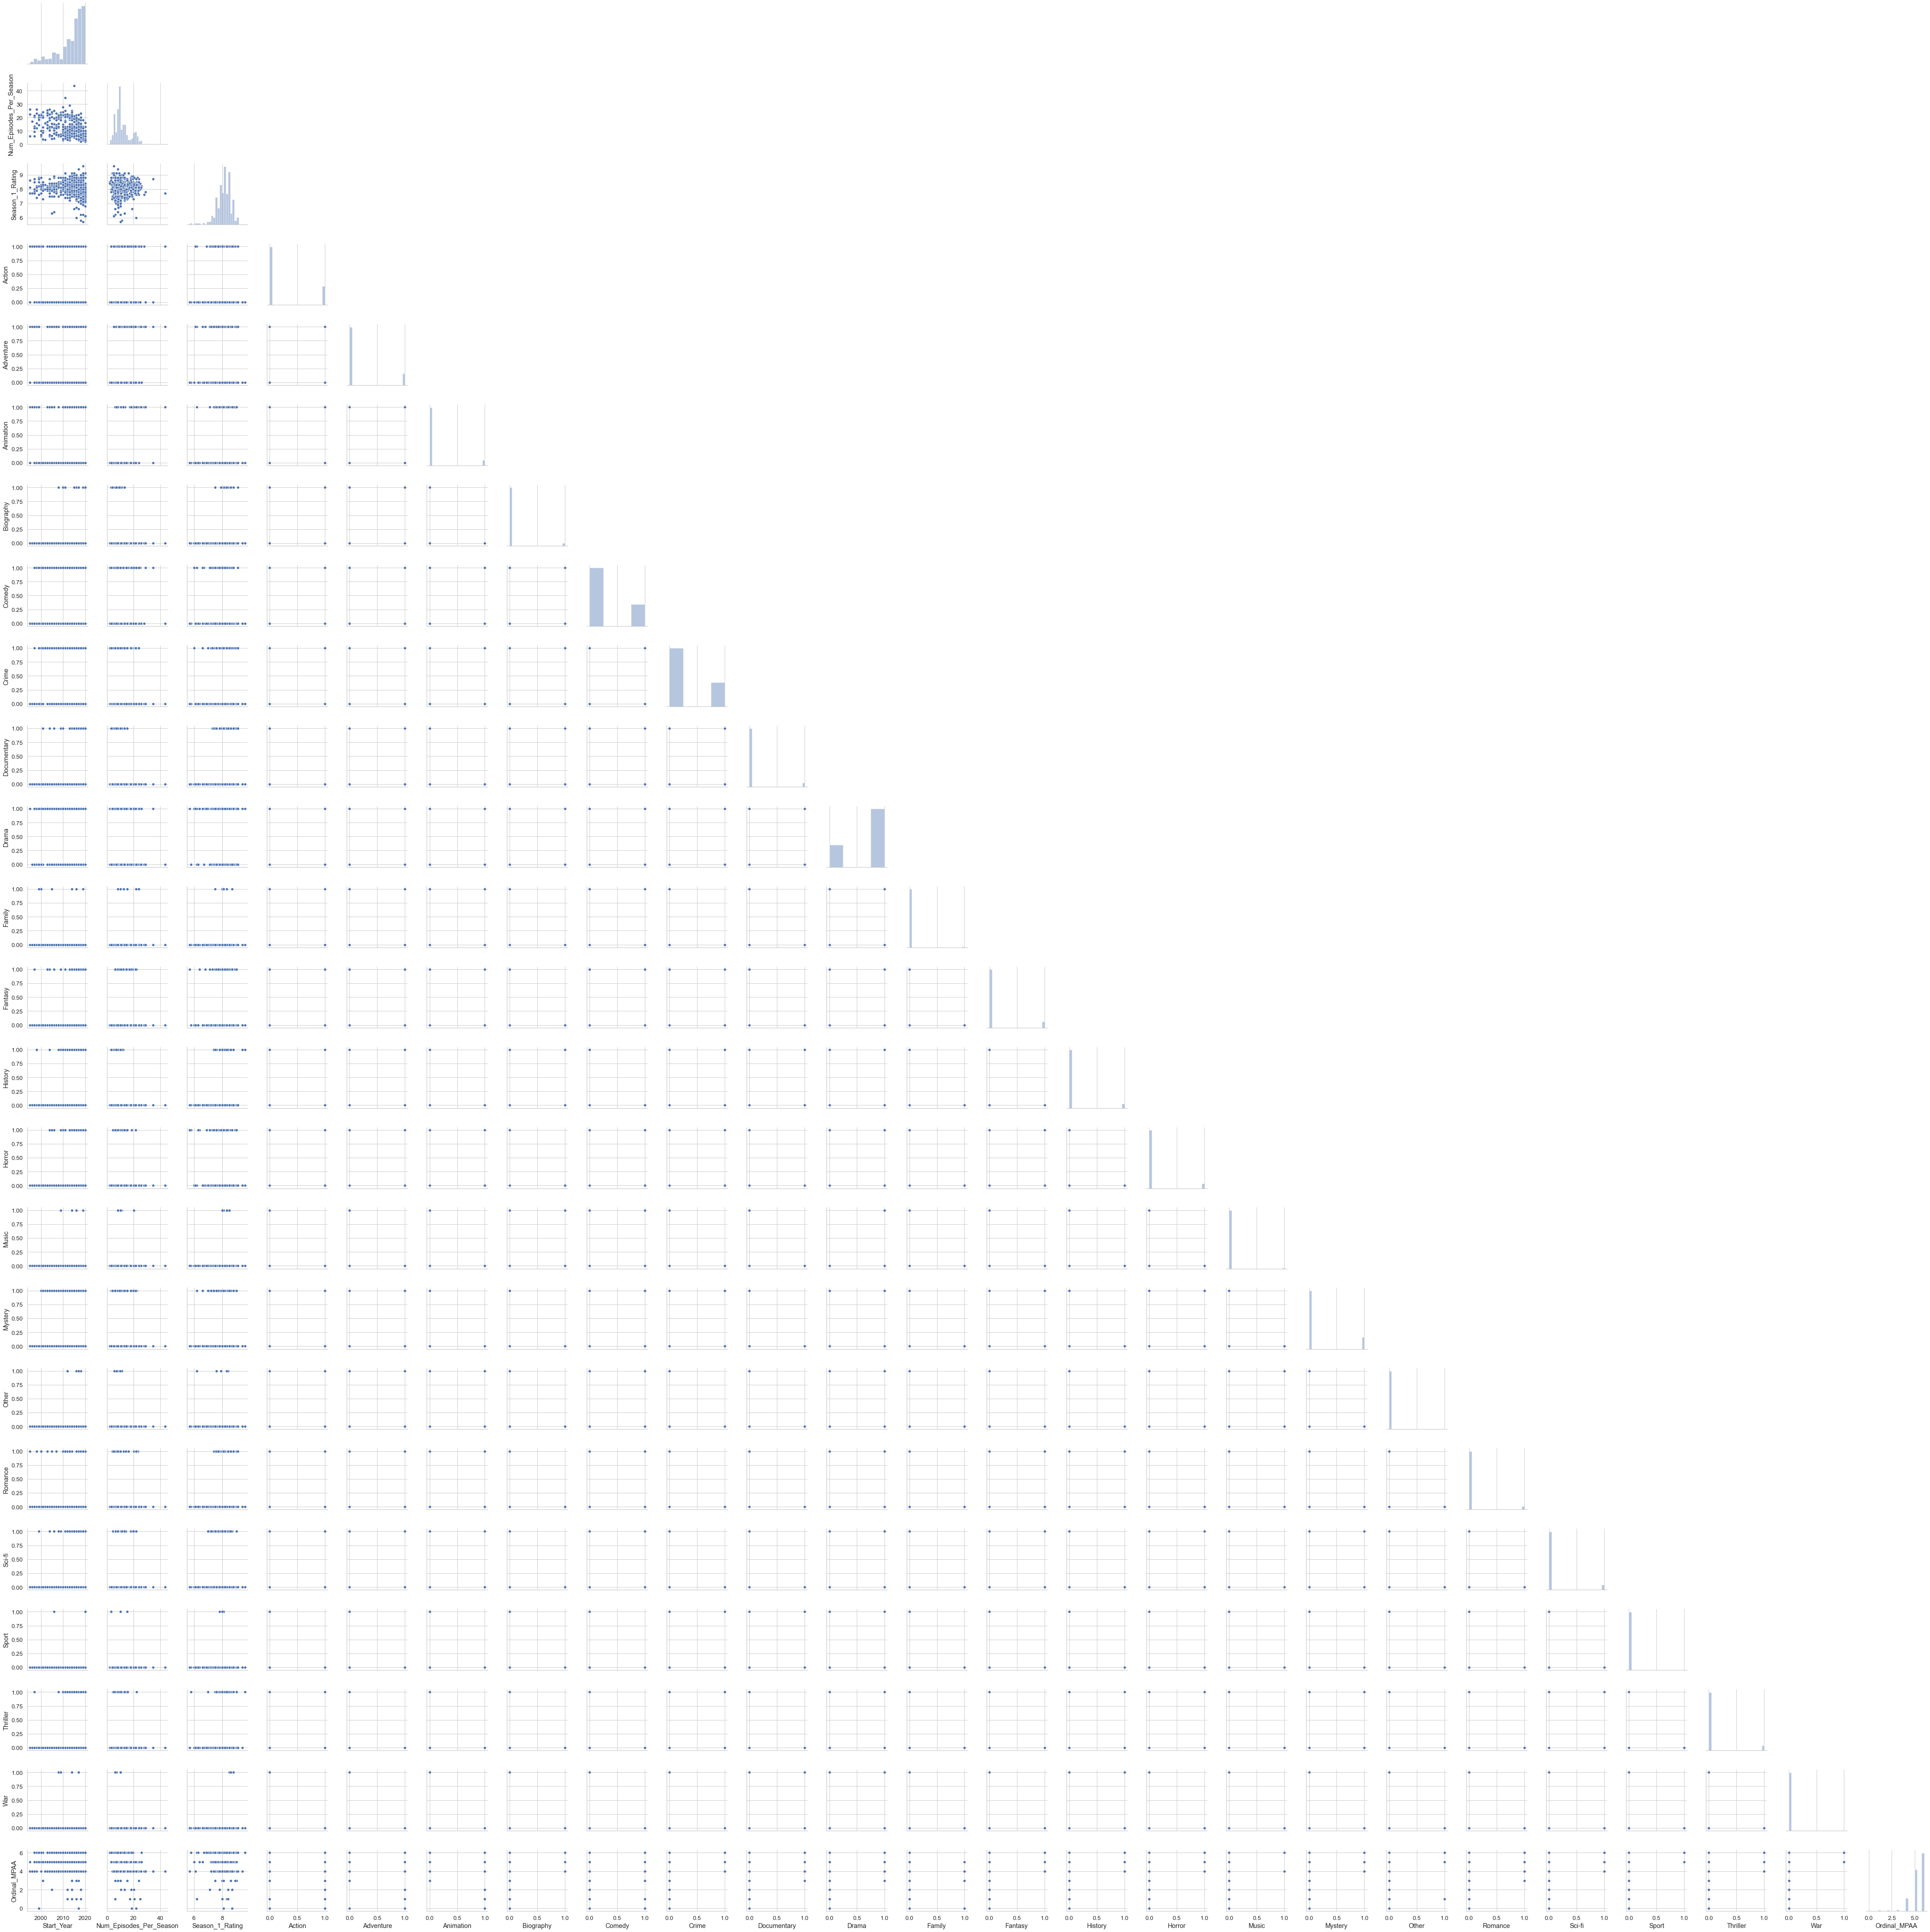

In [9]:
g = sns.PairGrid(df_og[features1].sample(frac=0.6), diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

## Second dataset

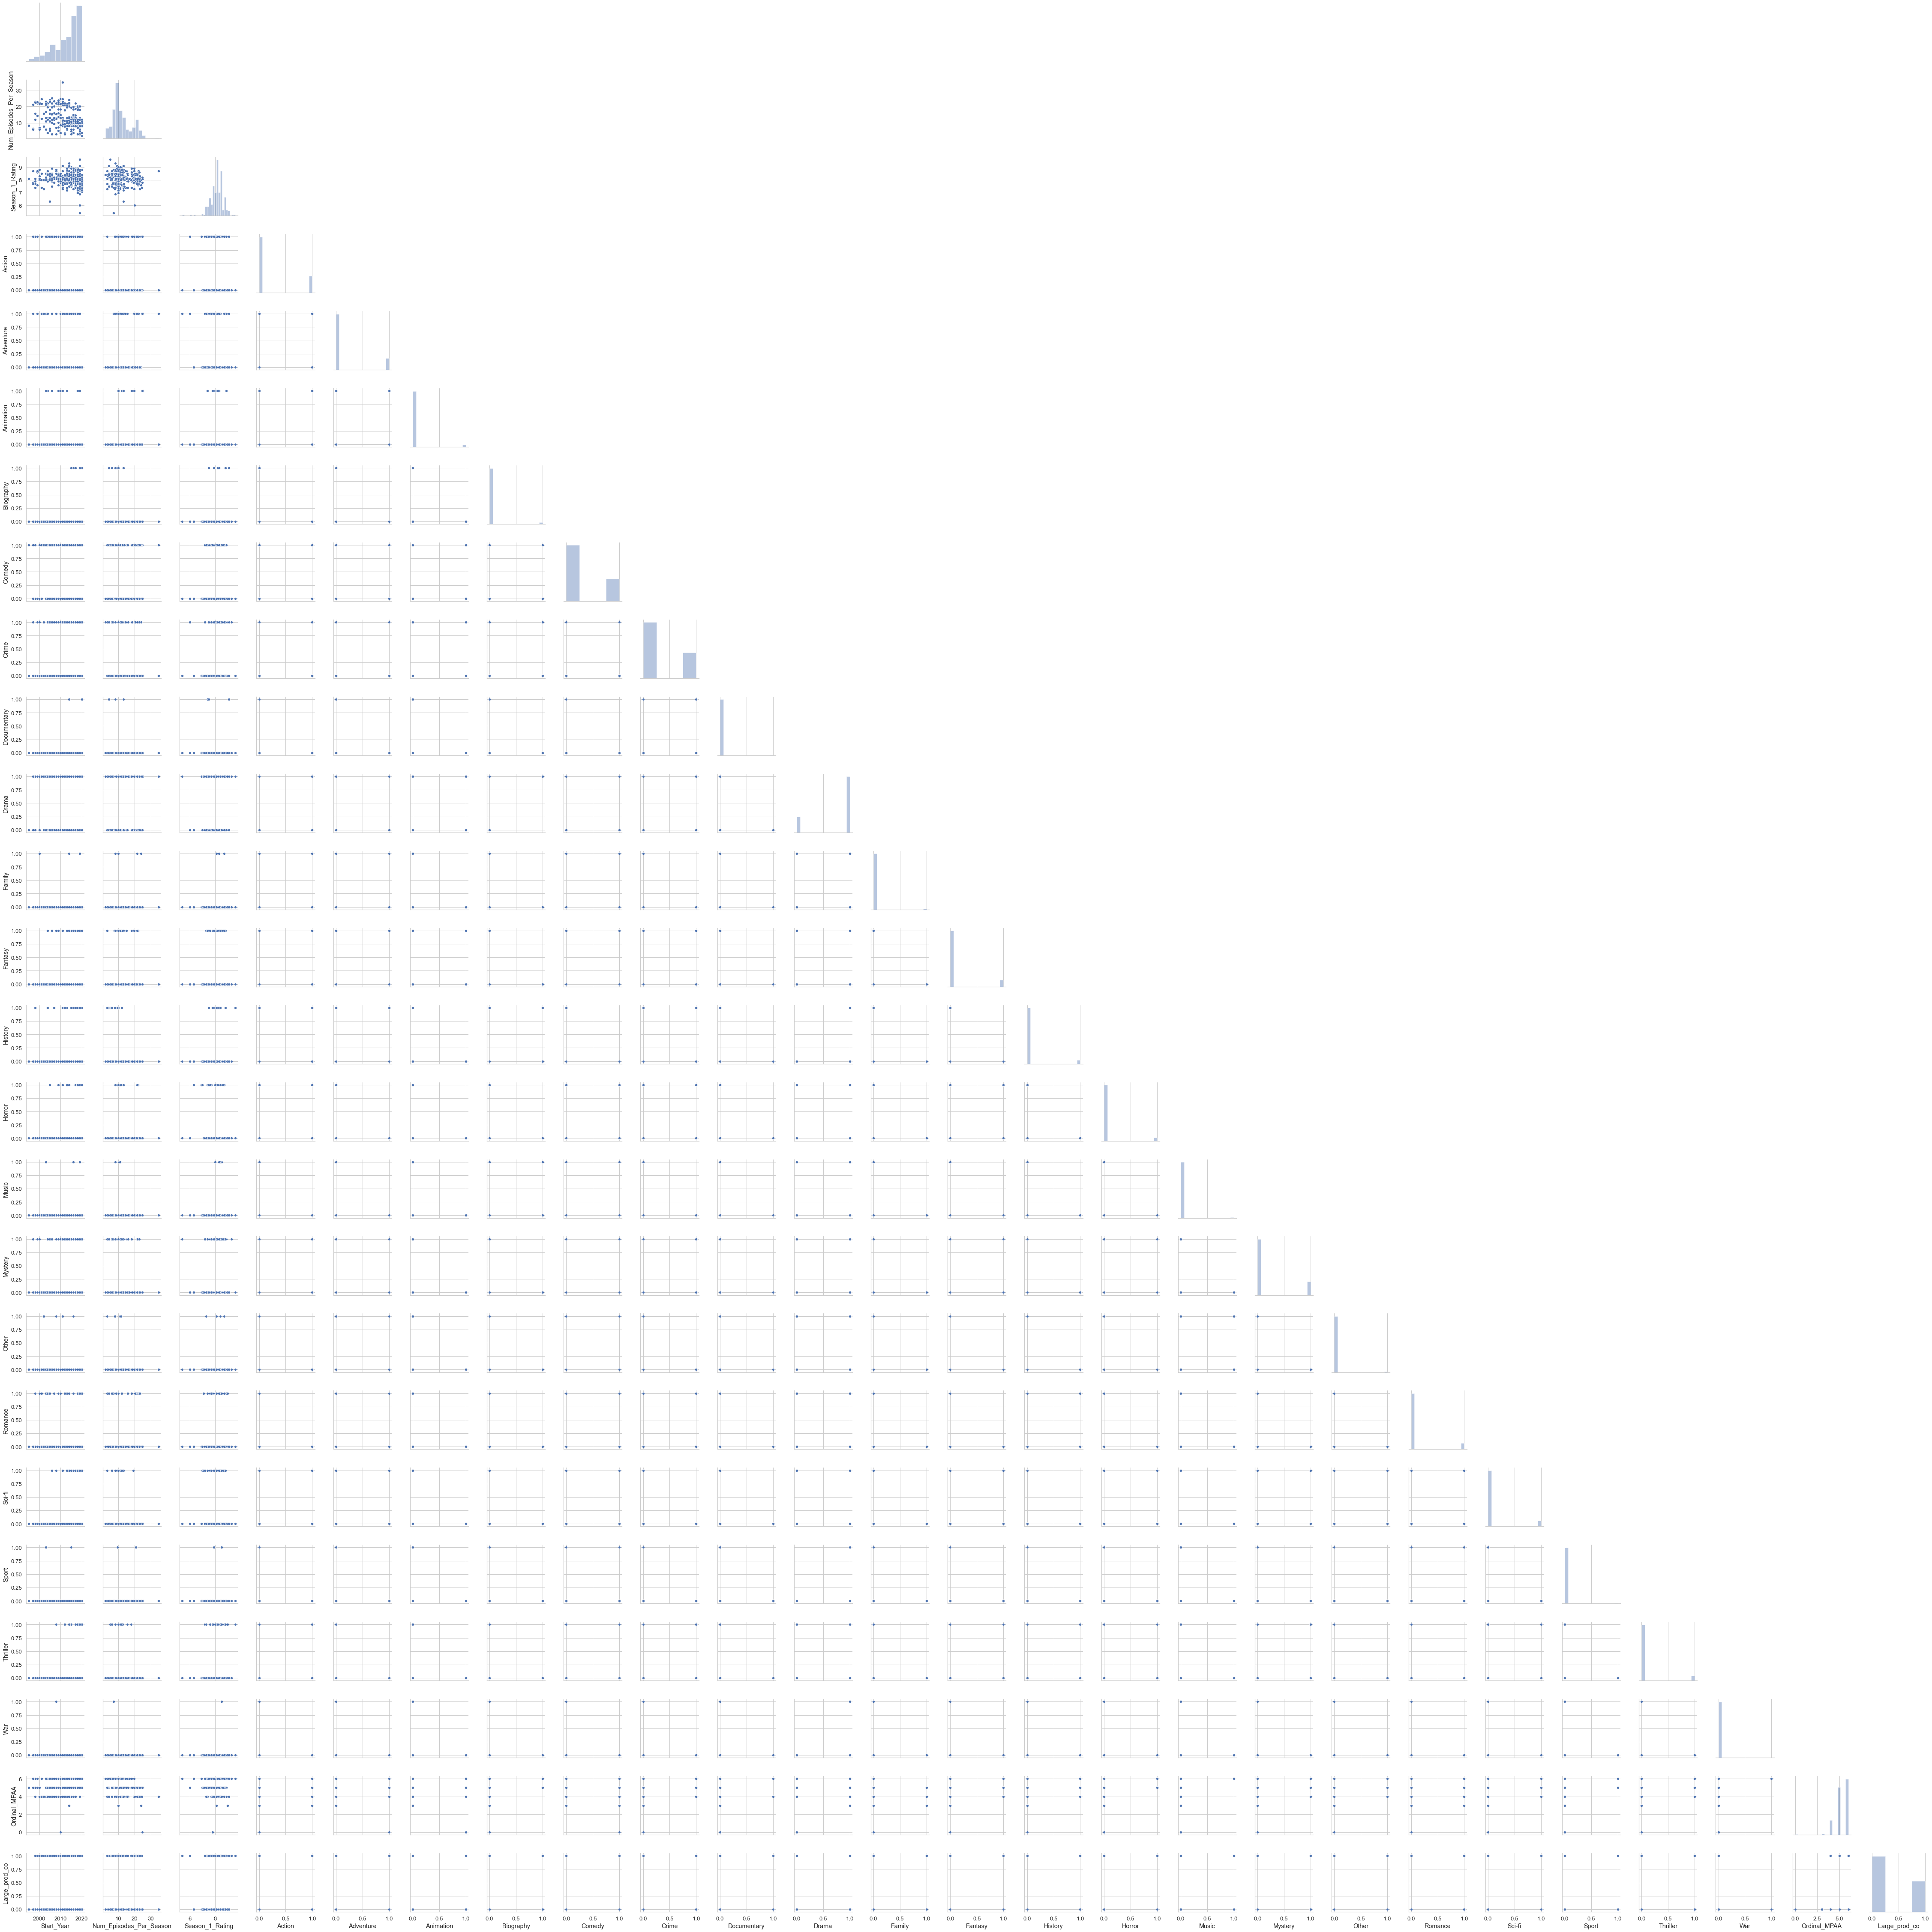

In [11]:
g = sns.PairGrid(df_prod[features2].sample(frac=0.6), diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

### Set up for modeling

In [52]:
#data without production company
X_og = df_og[features1]
y_og = df_og[target]

#data including production company
X_prod = df_prod[features2]
y_prod = df_prod[target]

In [53]:
#Split the first dataset 55 - 25 - 20 train/val/test

X_og_80, X_og_test, y_og_80, y_og_test = train_test_split(X_og, y_og, test_size=0.2,random_state=42)
X_og_train, X_og_val, y_og_train, y_og_val = train_test_split(X_og_80, y_og_80, test_size=.25, random_state=43)

In [54]:
#Split the second data 55 - 25 - 20 train/val/test

X_prod_80, X_prod_test, y_prod_80, y_prod_test = train_test_split(X_prod, y_prod, test_size=0.2,random_state=42)
X_prod_train, X_prod_val, y_prod_train, y_prod_val = train_test_split(X_prod_80, y_prod_80, test_size=.25, random_state=43)

## Check Lasso Regularization

In [55]:
#data without production company
lasso_model_og = Lasso()

lasso_model_og.fit(X_og_train, y_og_train)

Lasso()

In [56]:
lasso_model_og.score(X_og_train, y_og_train)

0.32535405627973557

In [57]:
lasso_model_og.score(X_og_val, y_og_val)

0.4508580035375168

In [76]:
list(zip(features1, lasso_model_og.coef_))

[('Start_Year', -0.23170193879151918),
 ('Num_Episodes_Per_Season', 0.06987070773361612),
 ('Season_1_Rating', -0.0),
 ('Action', -0.0),
 ('Adventure', -0.0),
 ('Animation', -0.0),
 ('Biography', -0.0),
 ('Comedy', 0.0),
 ('Crime', 0.0),
 ('Documentary', -0.0),
 ('Drama', -0.0),
 ('Family', 0.0),
 ('Fantasy', -0.0),
 ('History', -0.0),
 ('Horror', 0.0),
 ('Music', -0.0),
 ('Mystery', 0.0),
 ('Other', 0.0),
 ('Romance', -0.0),
 ('Sci-fi', -0.0),
 ('Sport', 0.0),
 ('Thriller', 0.0),
 ('War', -0.0),
 ('Ordinal_MPAA', 0.0)]

In [58]:
#data including production company
lasso_model_prod = Lasso()

lasso_model_prod.fit(X_prod_train, y_prod_train)

Lasso()

In [59]:
lasso_model_prod.score(X_prod_train, y_prod_train)

0.3942043312532896

In [60]:
lasso_model_prod.score(X_prod_val, y_prod_val)

0.34928828250122057

In [75]:
list(zip(features2, lasso_model_prod.coef_))

[('Start_Year', -0.26119345460458276),
 ('Num_Episodes_Per_Season', 0.11007478849325915),
 ('Season_1_Rating', -0.0),
 ('Action', -0.0),
 ('Adventure', -0.0),
 ('Animation', 0.0),
 ('Biography', -0.0),
 ('Comedy', 0.0),
 ('Crime', 0.0),
 ('Documentary', -0.0),
 ('Drama', -0.0),
 ('Family', 0.0),
 ('Fantasy', -0.0),
 ('History', -0.0),
 ('Horror', 0.0),
 ('Music', -0.0),
 ('Mystery', -0.0),
 ('Other', 0.0),
 ('Romance', -0.0),
 ('Sci-fi', -0.0),
 ('Sport', 0.0),
 ('Thriller', 0.0),
 ('War', -0.0),
 ('Ordinal_MPAA', -0.0),
 ('Large_prod_co', 0.0)]

### looks like it wants to set a lot of these equal to zero, oh no.

## Check Ridge regularization now

In [62]:
lr_model_ridge_og = Ridge()
lr_model_ridge_og.fit(X_og_train, y_og_train)

Ridge()

In [63]:
#data without production company
lr_model_ridge_og.score(X_og_train, y_og_train)

0.3923558970498543

In [64]:
lr_model_ridge_og.score(X_og_val, y_og_val)

0.45654106106223713

In [65]:
list(zip(X_og_train, lr_model_ridge_og.coef_))

[('Start_Year', -0.2527729907752691),
 ('Num_Episodes_Per_Season', 0.09515006284702839),
 ('Season_1_Rating', -0.2624447473983035),
 ('Action', -0.42276145922188635),
 ('Adventure', -0.2304269316429217),
 ('Animation', -0.345610661637804),
 ('Biography', -0.48946176606547764),
 ('Comedy', 0.36294047067822843),
 ('Crime', 0.7886791025312334),
 ('Documentary', -1.3052417198840809),
 ('Drama', -0.5473478407802906),
 ('Family', 0.8225018204586824),
 ('Fantasy', -0.4202552627161055),
 ('History', -0.6284478781515672),
 ('Horror', 0.07681308458747323),
 ('Music', -0.6016124096157007),
 ('Mystery', -0.2820991036092904),
 ('Other', 2.4759283635267324),
 ('Romance', -0.4670863706831131),
 ('Sci-fi', -0.2737384850314771),
 ('Sport', 0.4766318483988679),
 ('Thriller', 0.3840780316232209),
 ('War', -0.24915738803635631),
 ('Ordinal_MPAA', 0.041480772196580515)]

In [66]:
#data with production company
lr_model_ridge_prod = Ridge()
lr_model_ridge_prod.fit(X_prod_train, y_prod_train)

Ridge()

In [67]:
lr_model_ridge_prod.score(X_prod_train, y_prod_train)

0.5154758939260966

In [68]:
lr_model_ridge_prod.score(X_prod_val, y_prod_val)

0.2714499862751014

### Wow so ridge has way higher R^2 scores! 

### Gonna check out stats values next

In [70]:
sm.add_constant(X_og_train).head()

,const,Start_Year,Num_Episodes_Per_Season,Season_1_Rating,Action,Adventure,Animation,Biography,Comedy,Crime,...,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War,Ordinal_MPAA
429,1.0,2007,11.0,8.4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
579,1.0,2019,7.0,9.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
917,1.0,2018,12.0,7.8,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,5
796,1.0,2011,10.0,7.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
251,1.0,2020,10.0,7.9,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,6


## Check the stats for model without production company

In [72]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model_og = sm.OLS(y_og_train, sm.add_constant(X_og_train))
results = model_og.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Num_of_Seasons   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     13.04
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           7.99e-39
Time:                        11:25:17   Log-Likelihood:                -1165.9
No. Observations:                 509   AIC:                             2382.
Df Residuals:                     484   BIC:                             2488.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     513.9216     41.386     12.418      0.000     432.604     595.239
Start_Year                 -0.2530      0.020    -12.355      0.000      -0.293      -0.213
Num_Episodes_Per_Season     0.0952      0.022      4.286      0.000       0.052       0.139
Season_1_Rating            -0.2587      0.234     -1.105      0.270      -0.718       0.201
Action                     -0.4285      0.341     -1.257      0.210      -1.098       0.241
Adventure                  -0.2473      0.383     -0.646      0.518      -0.999       0.504
Animation                  -0.3724      0.454     -0.820      0.412      -1.264       0.520
Biography                  -0.5082      0.685     -0.742      0.458      -1.854       0.837
Comedy                      0.3488      0.345      1.012      0.312      -0.328       1.026
Crime                       0.8019      0.301      2.667      0.008       0.211       1.393
Documentary                -1.3919      0.633     -2.197      0.028      -2.637      -0.147
Drama                      -0.5768      0.344     -1.675      0.095      -1.253       0.100
Family                      0.9572      0.995      0.962      0.337      -0.998       2.913
Fantasy                    -0.4266      0.371     -1.148      0.251      -1.156       0.303
History                    -0.6269      0.566     -1.107      0.269      -1.739       0.486
Horror                      0.0795      0.472      0.169      0.866      -0.848       1.007
Music                      -0.7437      1.041     -0.714      0.475      -2.790       1.302
Mystery                    -0.2947      0.339     -0.869      0.386      -0.961       0.372
Other                       2.7731      0.853      3.252      0.001       1.098       4.448
Romance                    -0.4877      0.459     -1.062      0.289      -1.390       0.414
Sci-fi                     -0.2756      0.406     -0.678      0.498      -1.074       0.523
Sport                       0.6133      1.248      0.491      0.623      -1.839       3.065
Thriller                    0.3870      0.435      0.890      0.374      -0.468       1.242
War                        -0.3226      1.874     -0.172      0.863      -4.005       3.360
Ordinal_MPAA                0.0415      0.142      0.292      0.770      -0.237       0.320
==============================================================================
Omnibus:                      283.522   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4002.242
Skew:                           2.108   Prob(JB):                         0.00
Kurtosis:                      16.074   Cond. No.                     7.67e+05
==============================================================================

Warnings:
[1] Standard Errors as

## Check the stats for model including production company

In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model_prod = sm.OLS(y_prod_train, sm.add_constant(X_prod_train))
results_prod = model_prod.fit()

results_prod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Num_of_Seasons   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     11.16
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           1.07e-28
Time:                        11:26:17   Log-Likelihood:                -639.02
No. Observations:                 285   AIC:                             1330.
Df Residuals:                     259   BIC:                             1425.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     541.0558     54.368      9.952      0.000     433.995     648.116
Start_Year                 -0.2661      0.027     -9.890      0.000      -0.319      -0.213
Num_Episodes_Per_Season     0.1507      0.034      4.441      0.000       0.084       0.217
Season_1_Rating            -0.5710      0.363     -1.573      0.117      -1.286       0.144
Action                     -0.3401      0.410     -0.830      0.407      -1.147       0.467
Adventure                  -0.0593      0.480     -0.123      0.902      -1.004       0.886
Animation                   0.4593      0.732      0.628      0.531      -0.982       1.900
Biography                  -0.8416      0.969     -0.868      0.386      -2.750       1.067
Comedy                      0.3240      0.466      0.696      0.487      -0.593       1.241
Crime                       0.5102      0.392      1.303      0.194      -0.261       1.281
Documentary                -1.1593      1.559     -0.744      0.458      -4.229       1.911
Drama                      -0.4921      0.463     -1.064      0.289      -1.403       0.419
Family                      1.5537      1.493      1.041      0.299      -1.386       4.493
Fantasy                    -0.2031      0.498     -0.408      0.684      -1.183       0.777
History                    -0.6427      0.754     -0.852      0.395      -2.128       0.842
Horror                      0.3730      0.658      0.567      0.571      -0.922       1.668
Music                       0.0278      1.474      0.019      0.985      -2.874       2.930
Mystery                    -0.3197      0.414     -0.772      0.441      -1.135       0.495
Other                       6.2301      1.183      5.267      0.000       3.901       8.559
Romance                    -0.1216      0.578     -0.210      0.833      -1.259       1.016
Sci-fi                     -1.1019      0.522     -2.110      0.036      -2.130      -0.074
Sport                       1.9648      1.726      1.138      0.256      -1.435       5.364
Thriller                    0.5329      0.550      0.970      0.333      -0.549       1.615
War                        -2.8105      2.446     -1.149      0.252      -7.628       2.007
Ordinal_MPAA                0.2271      0.221      1.027      0.305      -0.208       0.662
Large_prod_co               0.2261      0.316      0.716      0.475      -0.396       0.848
==============================================================================
Omnibus:                      106.511   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              890.304
Skew:                           1.267   Prob(JB):                    4.71e-194
Kurtosis:                      11.280   Cond. No.                     7.73e+05
====================

## Back to the Lasso model

check the plot for data without prod company

In [91]:
test_set_pred_og = lasso_model_og.predict(X_og_test)

In [93]:
residuals = abs(test_set_pred_og - y_og_test)

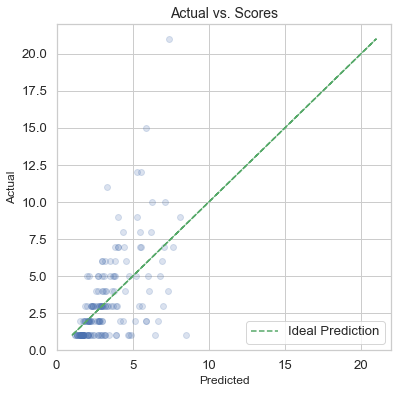

In [97]:
plt.figure(figsize = (6,6))
plt.scatter(test_set_pred_og, y_og_test, alpha = 0.2)
plt.plot(y_og_test, y_og_test, 'm--', label = 'Ideal Prediction', c = 'g')
plt.title('Actual vs. Scores', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.legend()

In [90]:
#r-squared
r2_score(y_og_test, test_set_pred)

0.34175027215801523

## Probably have some variables that are colinear
# Next try lassocv and ridgecv

**lassocv to find the best alpha**

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#find the mean and standard deviation of the training set to scale them
std_og = StandardScaler()
std_og.fit(X_og_train.values)


#Scale the Predictors on both the train and test set based on the scale found above
X_tr_og = std_og.transform(X_og_train.values)
X_v_og = std_og.transform(X_og_val.values)

In [122]:
#Run the cross validation, find the best alpha, refit the model on all the data with that alpha

lasso_model_og2 = LassoCV(cv=5)
lasso_model_og2.fit(X_tr_og, y_og_train)


LassoCV(cv=5)

In [123]:
#this was the best alpha it found
lasso_model_og2.alpha_

0.16887048901536575

In [124]:
#these are the standardized coeffs when the model refit using the new alpha
list(zip(X_og_train.columns, lasso_model_og2.coef_))

[('Start_Year', -1.3647352477620696),
 ('Num_Episodes_Per_Season', 0.40019032882706046),
 ('Season_1_Rating', -0.0),
 ('Action', -0.0),
 ('Adventure', -0.0),
 ('Animation', -0.0),
 ('Biography', -0.0),
 ('Comedy', 0.14491852231728655),
 ('Crime', 0.19286467228333093),
 ('Documentary', -0.06080154601955293),
 ('Drama', -0.0),
 ('Family', 0.0),
 ('Fantasy', -0.0),
 ('History', -0.08012058105294381),
 ('Horror', 0.0),
 ('Music', -0.0),
 ('Mystery', -0.0),
 ('Other', 0.20945079967394906),
 ('Romance', -0.0),
 ('Sci-fi', -0.0),
 ('Sport', 0.0),
 ('Thriller', 0.0),
 ('War', -0.0),
 ('Ordinal_MPAA', 0.0)]

In [125]:
# Make predictions on the test set using the new model
val_set_pred = lasso_model_og2.predict(X_v_og)

In [109]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [126]:
#find the MAE and R^2 on the test set using this model
mae(y_og_test, val_set_pred)

2.3960371285408955

In [127]:
#find the R^2 on the test set using this model
r2_score(y_og_val, val_set_pred)

0.46373851102726515

**Now apply it on the data with prod co**

In [128]:
#find the mean and standard deviation of the training set for scaling
std_prod = StandardScaler()
std_prod.fit(X_prod_train.values)


#Scale the Predictors on both the train and test set based on the scale found above
X_tr_prod = std_prod.transform(X_prod_train.values)
X_v_prod = std_prod.transform(X_prod_val.values)

In [129]:
#Run the cross validation, find the best alpha, refit the model on all the data with that alpha

lasso_model_prod2 = LassoCV(cv=5)
lasso_model_prod2.fit(X_tr_prod, y_prod_train)


LassoCV(cv=5)

In [130]:
#this was the best alpha it found
lasso_model_prod2.alpha_

0.20949793027974048

In [131]:
#these are the standardized coeffs when the model refit using the new alpha
list(zip(X_prod_train.columns, lasso_model_prod2.coef_))

[('Start_Year', -1.4501469353651113),
 ('Num_Episodes_Per_Season', 0.6514625108918891),
 ('Season_1_Rating', -0.0),
 ('Action', -0.0),
 ('Adventure', -0.0),
 ('Animation', 0.0),
 ('Biography', -0.01208399924444871),
 ('Comedy', 0.13172969489599862),
 ('Crime', 0.0),
 ('Documentary', -0.0),
 ('Drama', -0.08058912704210593),
 ('Family', 0.0),
 ('Fantasy', -0.0),
 ('History', -0.014828132277362668),
 ('Horror', 0.0),
 ('Music', -0.0),
 ('Mystery', -0.0),
 ('Other', 0.6036214024315171),
 ('Romance', -0.0),
 ('Sci-fi', -0.15463187651746294),
 ('Sport', 0.0),
 ('Thriller', 0.0),
 ('War', -0.0),
 ('Ordinal_MPAA', -0.0),
 ('Large_prod_co', 0.0)]

In [133]:
# Make predictions on the test set using the new model
val_set_pred = lasso_model_prod2.predict(X_v_prod)

In [135]:
#find the MAE and R^2 on the test set using this model
mae(y_prod_val, val_set_pred)

1.8126419788199757

In [136]:
#find the R^2 on the test set using this model
r2_score(y_prod_val, val_set_pred)

0.3397806898172129

### Try Ridgecv now

**Try on the data without production company**

In [137]:
#find the mean and standard deviation of the training seet
std_og = StandardScaler()
std_og.fit(X_og_train.values)


#Scale the Predictors on both the train and test set based on the scale found above
X_tr_og = std_og.transform(X_og_train.values)
X_v_og = std_og.transform(X_og_val.values)

In [139]:
#Run the cross validation, find the best alpha, refit the model on all the data with that alpha

ridge_model_og2 = RidgeCV(cv=5)
ridge_model_og2.fit(X_tr_og, y_og_train)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [141]:
#this was the best alpha it found
ridge_model_og2.alpha_

10.0

In [144]:
#these are the standardized coeffs when the model refit using the new alpha
list(zip(X_og_train.columns, ridge_model_og2.coef_))

[('Start_Year', -1.4639834993761702),
 ('Num_Episodes_Per_Season', 0.5614938745131356),
 ('Season_1_Rating', -0.12286232271791238),
 ('Action', -0.16987712770270272),
 ('Adventure', -0.09209161042020289),
 ('Animation', -0.10114030179047265),
 ('Biography', -0.09007034526591991),
 ('Comedy', 0.16420474855307107),
 ('Crime', 0.3540624261952822),
 ('Documentary', -0.31157062332226704),
 ('Drama', -0.24726062587355552),
 ('Family', 0.10509166799452106),
 ('Fantasy', -0.13538187114600927),
 ('History', -0.13956612403386032),
 ('Horror', 0.018603039856119122),
 ('Music', -0.07862186808560377),
 ('Mystery', -0.10373632056339487),
 ('Other', 0.35798255919853395),
 ('Romance', -0.12124659839136688),
 ('Sci-fi', -0.08520757282731024),
 ('Sport', 0.05183672462579457),
 ('Thriller', 0.10496512767460292),
 ('War', -0.02093065512976291),
 ('Ordinal_MPAA', 0.030773311981498998)]

In [145]:
# Make predictions on the val set using the new model
val_set_pred_og2 = ridge_model_og2.predict(X_v_og)

In [148]:
#find the MAE and R^2 on the test set using this model
mae(y_og_val, val_set_pred_og2)

1.5880889716354472

In [149]:
#find the R^2 on the test set using this model
r2_score(y_og_val, val_set_pred_og2)

0.453330739195969

**Try on the data including production company**

In [138]:
#find the mean and standard deviation of the training seet
std_prod = StandardScaler()
std_prod.fit(X_prod_train.values)


#Scale the Predictors on both the train and test set based on the scale found above
X_tr_prod = std_prod.transform(X_prod_train.values)
X_v_prod = std_prod.transform(X_prod_val.values)

In [140]:
#Run the cross validation, find the best alpha, refit the model on all the data with that alpha

ridge_model_prod2 = RidgeCV(cv=5)
ridge_model_prod2.fit(X_tr_prod, y_prod_train)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [142]:
#this was the best alpha it found
ridge_model_prod2.alpha_

10.0

In [143]:
#these are the standardized coeffs when the model refit using the new alpha
list(zip(X_prod_train.columns, ridge_model_prod2.coef_))

[('Start_Year', -1.5536195227561571),
 ('Num_Episodes_Per_Season', 0.7710793769675404),
 ('Season_1_Rating', -0.22291117503528254),
 ('Action', -0.14816607512728094),
 ('Adventure', -0.027681662393827536),
 ('Animation', 0.10614839204594616),
 ('Biography', -0.1399592797771294),
 ('Comedy', 0.14635858630060591),
 ('Crime', 0.22547648888586871),
 ('Documentary', -0.12139222730415979),
 ('Drama', -0.2196353307993156),
 ('Family', 0.1397389030477346),
 ('Fantasy', -0.0671451915419934),
 ('History', -0.14639013622423144),
 ('Horror', 0.08474376847506489),
 ('Music', -0.0020748618748566835),
 ('Mystery', -0.1334704217110997),
 ('Other', 0.7791743042746896),
 ('Romance', -0.03182226041111629),
 ('Sci-fi', -0.33416079881624117),
 ('Sport', 0.16209198994260637),
 ('Thriller', 0.13872009235287683),
 ('War', -0.15854272700093777),
 ('Ordinal_MPAA', 0.141123845699656),
 ('Large_prod_co', 0.11930407786652979)]

In [146]:
# Make predictions on the test set using the new model
val_set_pred_prod2 = ridge_model_prod2.predict(X_v_prod)

In [147]:
#find the MAE and R^2 on the test set using this model
mae(y_prod_val, val_set_pred_prod2)

2.0406412715237106

In [150]:
#find the R^2 on the test set using this model
r2_score(y_prod_val, val_set_pred_prod2)

0.2668242630291564

| W/ Production Co. |  Train  |  Validate  |  MAE  |   
|-------------------|:-------:|------------|-------|
|  **LassoCV**      | ~0.39   |  ~0.35     | ~1.8  |   
|  **RidgeCV**      | ~0.52   |  ~0.49     | ~2.0  |     

| W/OUT Production Co. |  Train  |  Validate  |  MAE  |   
|----------------------|:-------:|------------|-------|
|  **LassoCV**         | ~0.33   |  ~0.45     | ~2.4  |   
|  **RidgeCV**         | ~0.39   |  ~0.46     | ~1.6  |   

## All things considered, I will choose a ridge model on the data without production company